# A repository to visualize AST of functions

## DATA PARSING

In [9]:
import ast
import requests
import inspect

In [10]:
# test function

def hello():
    print('hello')
    for i in range(100):
        print(i)
    requests.get('https://docs.python.org/2/library/inspect.html')
    
def ira():
    for i in range(25):
        print("i am %d years old!" % (i+1))
    print('heyyy')
    requests.get
    if ira.__name__ == 'ira':
        print('yesss!')
        
def simple():
    print('simple')

In [11]:
# get source code str + ast.parse
import functools

def insp_parse(method):
    
    @functools.wraps(method)
    def wrapper(*args, **kwargs):
        _func = inspect.getsource(args[0])
        p_func = ast.parse(_func)
        de_parsed = method(p_func, **kwargs)
        json_parsed = json.loads(de_parsed)
        return json_parsed
    
    return wrapper

In [12]:
# get ast from func

from _ast import AST
import json
from pprint import pprint

@insp_parse
def ast2json(node):
    def _format(node):
        if isinstance( node, AST ):
            fields = [ ( '_PyType', _format( node.__class__.__name__ ) ) ]
            fields += [ ( a, _format( b ) ) for a, b in iter_fields( node ) ]
            return '{ %s }' % ', '.join( ( '"%s": %s' % field for field in fields ) )

        if isinstance( node, list ):
            return '[ %s ]' % ', '.join( [ _format( x ) for x in node ] )

        return json.dumps(node)


    return _format( node )



def iter_fields( node ):
    try:
        for field in node._fields:
            yield field, getattr( node, field )
    except AttributeError:
        pass

In [13]:
# pprint before manipulation of ast.dump

pprint(ast.dump(ast.parse(inspect.getsource(hello))))

("Module(body=[FunctionDef(name='hello', args=arguments(args=[], vararg=None, "
 'kwonlyargs=[], kw_defaults=[], kwarg=None, defaults=[]), '
 "body=[Expr(value=Call(func=Name(id='print', ctx=Load()), "
 "args=[Str(s='hello')], keywords=[])), For(target=Name(id='i', ctx=Store()), "
 "iter=Call(func=Name(id='range', ctx=Load()), args=[Num(n=100)], "
 "keywords=[]), body=[Expr(value=Call(func=Name(id='print', ctx=Load()), "
 "args=[Name(id='i', ctx=Load())], keywords=[]))], orelse=[]), "
 "Expr(value=Call(func=Attribute(value=Name(id='requests', ctx=Load()), "
 "attr='get', ctx=Load()), "
 "args=[Str(s='https://docs.python.org/2/library/inspect.html')], "
 'keywords=[]))], decorator_list=[], returns=None)])')


In [15]:
# pprint after manipulation of ast.dump

pprint(ast2json(hello))

{'_PyType': 'Module',
 'body': [{'_PyType': 'FunctionDef',
           'args': {'_PyType': 'arguments',
                    'args': [],
                    'defaults': [],
                    'kw_defaults': [],
                    'kwarg': None,
                    'kwonlyargs': [],
                    'vararg': None},
           'body': [{'_PyType': 'Expr',
                     'value': {'_PyType': 'Call',
                               'args': [{'_PyType': 'Str', 's': 'hello'}],
                               'func': {'_PyType': 'Name',
                                        'ctx': {'_PyType': 'Load'},
                                        'id': 'print'},
                               'keywords': []}},
                    {'_PyType': 'For',
                     'body': [{'_PyType': 'Expr',
                               'value': {'_PyType': 'Call',
                                         'args': [{'_PyType': 'Name',
                                                   'ctx': {'_PyT

## GRAPHING

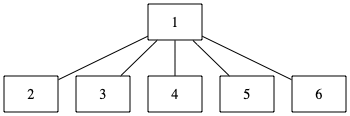

In [16]:
# have something to graph - an example
import pydot
from IPython.display import Image, display

def grapher(graph, li):
    for index, i in enumerate(li):
        if not index:
            node_from = pydot.Node(i, shape='box', label=i)
            continue
        node_to = pydot.Node(i, shape='box', label=i)
        graph.add_node(node_from)
        graph.add_node(node_to)
        graph.add_edge(pydot.Edge(node_from, node_to))
        note_from = node_to
        
def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)
        
graph = pydot.Dot(graph_type='graph')
grapher(graph, [1,2,3,4,5,6])
view_pydot(graph)

In [17]:
# VERSION 1
def _grapher(graph, dictionary, _node_from=''):
    for key, value in dictionary.items():
        if not _node_from:
            _node_from = value
            continue
        if not value:
            draw(_node_from, key)
        if key == '_PyType':
            draw(_node_from, value)
            _node_from = value
            continue
        if isinstance(value, dict):
            _grapher(graph, value, _node_from=_node_from)
        if isinstance(value, list):
            [_grapher(graph, item, _node_from=_node_from) for item in value]
        if isinstance(value, str):
            draw(_node_from, value)
            
def draw(parent_name, child_name):
#     print(parent_name, child_name)
    edge = pydot.Edge(parent_name, child_name)
    graph.add_edge(edge)

In [18]:
def hello():
    print('hello world!')
    
def more_hello():
    for i in range(10):
        print('hello world!')

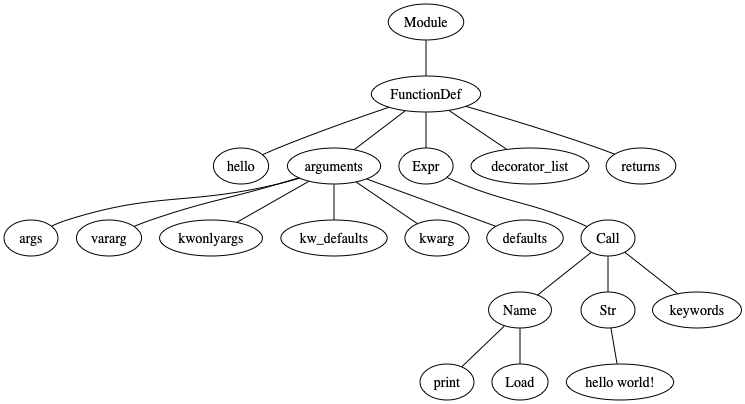

In [19]:
graph = pydot.Dot(graph_type='graph')
_grapher(graph, ast2json(hello))
view_pydot(graph)

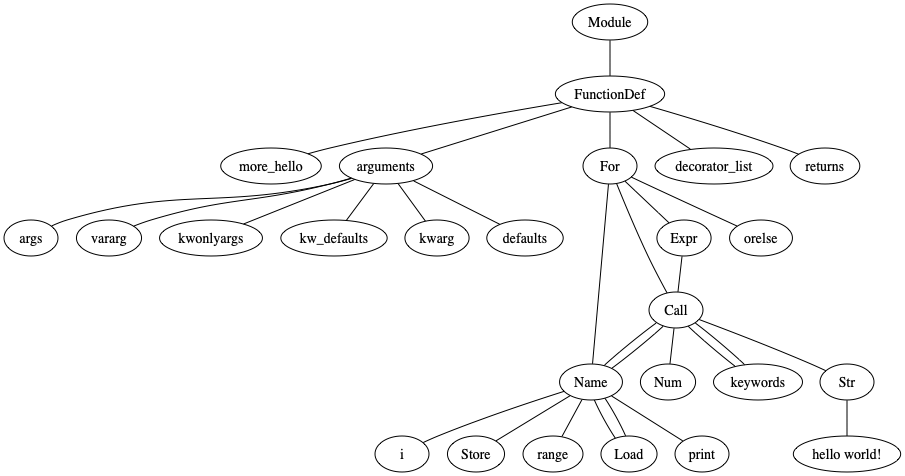

In [21]:
graph = pydot.Dot(graph_type='graph')
_grapher(graph, ast2json(more_hello))
view_pydot(graph)